In [1]:
import numpy as np
import pandas as pd
from konlpy.tag import *
import matplotlib.pylab as plt
%matplotlib inline
from korean_crawling_bundles import *

In [2]:
train_df = pd.read_csv('0921_with_link.csv')
train_df.tail()

,Title,Link,Doc
82,"추석 앞둔 韓 증시, 무역긴장·지정학적 리스크 완화에 상승 예상",https://finance.naver.com/news/news_read.nhn?a...,[머니투데이 김소연 기자] [[개장전]뉴욕증시 큰 폭 상승…다우존스·S&P500 사...
83,NaN,https://finance.naver.com/news/news_read.nhn?a...,[아시아경제 조호윤 기자]자본시장 참가자들이 추석 연휴 이후 국내외 증시 흐름에 영...
84,NaN,https://finance.naver.com/news/news_read.nhn?a...,[머니투데이 뉴욕(미국)=송정렬 특파원]\n\n다우존스산업평균지수와 S&P500지수...
85,NaN,https://finance.naver.com/news/news_read.nhn?a...,[머니투데이 뉴욕(미국)=송정렬 특파원]\n뉴욕증시의 3대 주요지수가 미중간 무역전...
86,[유럽증시]美中무역전쟁 합의 긍정 전망에..'상승',https://finance.naver.com/news/news_read.nhn?a...,[이데일리 뉴스속보팀] 유럽 주요 증시는 20일(현지시간) 미국과 중국 간의 무역전...


In [7]:
kkma = Kkma()

# train = train_df.iloc[:,1:].values
train = train_df['Doc'].values
train_report = [train[i] for i in range(len(train))]
print(len(train_report))
train_report[0]

87


'최종구 위원장 "내년 4월~5월 인터넷은행 예비인가 계획"\n머니투데이 | 권화순 기자 | 2018.09.21 09:53\n인터넷전문은행법이 20일 국회 본회의를 통과한 가운데 인터넷은행에 대한 추가 인가 계획과 관련, 최종구 금융위원장은 "추가 인가 방침을 구체적으로 만들어 내년 2월~3월 경 추가 인가 신청 접수를 받겠다"고 밝혔다.\n최 위원장은 21일 기자 브리핑을 통해 "인가 신청이 있으면 심사를 거쳐 내년 4월~5월쯤 추가적인 예비인가가 이뤄질 것"이라고 밝혔다.\n추가 인가 신청 타진이 있느냐는 질문에 대해서는 "(법 통과여부에 대한)불확실성이 있어서 결정을 내리지 힘들지 않았을까 싶다"며 "현재까지 타진이 들어오진 않았다"고 밝혔다.\n최종구 금융위원장이 21일 오전 서울 여의도 국회에서 열린 정무위원회 전체회의에서 의원들의 질의에 답하고 있다. \n최 위원장은 "법 공포 3개월 후 시행이 되기 때문에 연말 또는 내년초 법이 시행이 될 것이고 그 사이 시행령 제정을 완료할 계획"이라고 밝혔다.\n권화순 기자 firesoon@mt.co.kr\n<저작권자 ⓒ \'돈이 보이는 리얼타임 뉴스\' 머니투데이, 무단전재 및 재배포 금지>'

In [ ]:
try:
    training_ls = [str(kkma.nouns(train_report[i])) for i in range(len(train_report))]
except : 
    excepted_ls.append(i)
    print('{}th data is excepted, maybe it has NaN value'.format(i))
    
display(Markdown('#### length of data : {}'.format(len(training_ls))))

In [ ]:
word_df = pd.DataFrame(data = training_ls,columns=np.arange(1))
# df.to_csv('0916_konlpy.csv')
word_df.tail()

In [23]:
word_df.to_csv('konlpy_0921_link.csv',index=False)

In [24]:
for i in range(len(word_df)) : 
    word_df.iat[i,0] = word_df.iat[i,0][1:-1]
    
word_ls = []
for i in range(len(word_df)) : 
    new_ls = word_df.iat[i,0].split(',')

    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace(' ','')
    
    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace("'",'')
    
    word_ls += new_ls
len(word_ls)

312

In [25]:
print(len(word_ls))
for _ in range(10):
    for idx,i in enumerate(word_ls) : 
        if len(i) < 3:
             word_ls.pop(idx)
    print(len(word_ls))

312
243
210
210
210
210
210
210
210
210
210


In [26]:
from collections import Counter
cnt_dict = dict(Counter(word_ls))

df = pd.DataFrame(columns=['Count'])
df['Count'] = cnt_dict.values()
df.index = cnt_dict.keys()
df.sort_values('Count',ascending=False,inplace=True)

df

,Count
021,20
101,20
996387,20
-21,10
008,6
001,5
025,3
20180921091300291,3
015,3
20180921090841156,3


,Count
count,99.000000
mean,2.121212
std,3.393489
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,20.000000


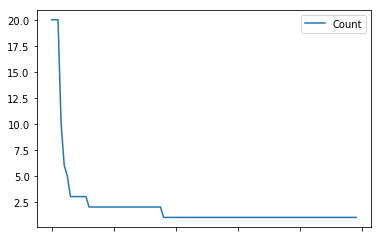

In [27]:
display(df.describe())
display(df.plot())

In [28]:
testing_ls = list(df[df['Count']>1].index)
len(testing_ls)

36

In [29]:
count_dictionary = dict(zip(np.arange(len(train_df)),[0 for _ in range(len(train_df))]))
for idx,doc in enumerate(train_df['Doc']):
    for word in testing_ls : 
        if word in doc : 
            count_dictionary[idx] += 1
count_dictionary

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 3,
 5: 1,
 6: 3,
 7: 2,
 8: 1,
 9: 2,
 10: 1,
 11: 1,
 12: 3,
 13: 1,
 14: 2,
 15: 1,
 16: 2,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 2,
 34: 1,
 35: 1,
 36: 1,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 1,
 45: 0,
 46: 1,
 47: 1,
 48: 0,
 49: 1,
 50: 1,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 1,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 2,
 68: 0,
 69: 3,
 70: 1,
 71: 0,
 72: 0,
 73: 1,
 74: 1,
 75: 2,
 76: 0,
 77: 2,
 78: 0,
 79: 1,
 80: 1,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0}

In [30]:
final_df = pd.DataFrame(columns=['Count'])
final_df['Count'] = count_dictionary.values()
final_df.index = count_dictionary.keys()
final_df.sort_values('Count',ascending=False,inplace=True)

final_df

,Count
69,3
4,3
6,3
12,3
77,2
67,2
33,2
7,2
9,2
16,2


In [31]:
most_freq = final_df.iloc[:5]
least_freq = final_df.iloc[-5:]

In [32]:
display(most_freq)
display(least_freq)

,Count
69,3
4,3
6,3
12,3
77,2


,Count
59,0
60,0
61,0
62,0
86,0


In [33]:
most_freq_link = []
least_freq_link = []

for idx in list(most_freq.index) : 
    most_freq_link.append(train_df['Link'][idx])
for idx in list(most_freq.index) :     
    least_freq_link.append(train_df['Link'][idx])
print(len(most_freq_link) , len(least_freq_link))

5 5


In [34]:
display(most_freq_link)
display(least_freq_link)

['http://v.media.daum.net/v/20180921093025994',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180921093901329&limit=30&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180921093025994&limit=30&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180921091038217&limit=30&page=1',
 'http://v.media.daum.net/v/20180921090841156']

['http://v.media.daum.net/v/20180921093025994',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180921093901329&limit=30&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180921093025994&limit=30&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180921091038217&limit=30&page=1',
 'http://v.media.daum.net/v/20180921090841156']